In [1]:
import matplotlib.pyplot as plt

In [38]:
import os
import json
import numpy as np


def pure_quebec():
    data = []

    for f_path in filter(lambda x: x.startswith("Pure") and "ibm_quebec" in x, os.listdir(os.path.join(os.getcwd(), 'results'))):
        with open(os.path.join(os.getcwd(), 'results', f_path), 'r') as f:
            data.append(json.loads(f.read()))

    data = np.array(data)
    mean = np.mean(data, axis=0)
    std = np.std(data, axis=0)**0.5
    return data, mean, std


def pure_kolkata():
    data = []

    for f_path in filter(lambda x: x.startswith("Pure") and "ibmq_kolkata" in x, os.listdir(os.path.join(os.getcwd(), 'results'))):
        with open(os.path.join(os.getcwd(), 'results', f_path), 'r') as f:
            data.append(json.loads(f.read()))

    data = np.array(data)
    mean = np.mean(data, axis=0)
    std = np.std(data, axis=0)**0.5
    return data, mean, std


def all():
    data = []

    for f_path in filter(lambda x: x.startswith("Pure"), os.listdir(os.path.join(os.getcwd(), 'results'))):
        with open(os.path.join(os.getcwd(), 'results', f_path), 'r') as f:
            data.append(json.loads(f.read()))

    data = np.array([x[:12] for x in data])
    mean = np.mean(data, axis=0)
    std = np.std(data, axis=0)
    return data, mean, std


qc = pure_quebec()
kk = pure_kolkata()

all = all()

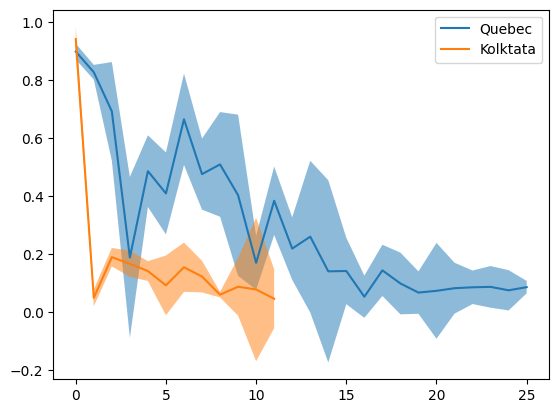

In [45]:
plt.plot(qc[1], label="Quebec")
plt.plot(kk[1], label="Kolktata")
# plt.plot(all[1], label="All")
# plt.plot([0, len(data)], [mean, mean], 'r--')
plt.fill_between(range(len(qc[1])), qc[1]-qc[2], qc[1]+qc[2], alpha=0.5)
plt.fill_between(range(len(kk[1])), kk[1]-kk[2], kk[1]+kk[2], alpha=0.5)
# plt.fill_between(range(len(all[1])), all[1]-all[2], all[1]+all[2], alpha=0.5)
plt.legend()
plt.show()

In [15]:
len(qc[1]), len(kk[1])

(26, 12)